![alternative text](../data/rosa-rafael-RjD01Is-KnI-unsplash.jpg)

# From Nashville Country to Global Pop: Tracing Taylor Swift's Lyricism Across Musical Eras

# Introduction

As music permeates across borders and genres, Taylor Swift's evolution from country's narrative songstress to pop's universal resonance personifies adaptive artistry and growth. This project explores the linguistic transformations underlying Swift's shifting musical style, examining how changes in her lyricism mirror her genre trajectory. Through analyzing the complexity and sentiment woven into her word choice, I aim to uncover not just Swift's progression as an artist, but also the developing language of music itself. These insights promise to illuminate the strategic decisions that fuel Swift's global engagement, highlighting how linguistic simplicity breeds emotional profundity in reaching worldwide audiences.

My hypothesis suggests Taylor Swift's pivot to pop genre entails deliberate lyrical simplification, embracing direct, affective language that resonates universally. This investigation seeks to unpack the implications of such streamlining, elucidating how Swift's word choices reflect her navigation of music's fluid industry landscapes, while mirroring the accessibility central to her pop ethos. 

# Methodology

## Data - Taylor Swift All Lyrics 

The dataset for this study comprises the complete collection of Taylor Swift's song lyrics, spanning her career from her debut album to "Midnight" released in 2022, all sourced from Kaggle.com. This compilation includes lyrics from all major original album releases, intentionally excluding variations and recent re-releases to maintain focus on the primary content reflective of each album's original period. This selection criteria ensure the analysis remains grounded in the authentic evolution of Swift's lyrical content, unaffected by potential lyrical modifications in later versions of albums. The dataset is meticulously curated to represent Swift's transition across musical genres, offering a comprehensive foundation for the morphological analysis.

source: https://www.kaggle.com/datasets/ishikajohari/taylor-swift-all-lyrics-30-albums

## Linguistic Analysis

- Overall Lexical diversity scores
- Part-of-Speech (POS) tagging  
     - Tagged lyrics for parts of speech (e.g. verb, adjective) 
     - Calculated verb and adjective type-token ratios
     - Compared POS diversity for verb and adjective classes
     - Checked for significant differences in verb/adjective variation

## NLP Analysis

## 1. Load, organize, and clean the data

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.tokenize import word_tokenize

# Define the base path to the 'Albums' directory
base_path = '../data/Albums'

# Initialize an empty list to store the data
data = []

for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith('.txt'):
            # Extract the album name and release year from the directory name
            album_info = root.split('/')[-1]
            release_year, album_name = album_info.split('_', 1)
            # Format album name to replace underscores with spaces
            album_name = album_name.replace('_', ' ')
            # Extract the song name from the file name, removing the file extension
            song = file.replace('.txt', '').replace('_', ' ').replace('PopVersion', '(Pop Version)').replace('LinerNotes', 'Liner Notes')
            # Read the lyrics from the file
            with open(os.path.join(root, file), 'r', encoding='utf-8') as f:
                lyrics = f.read()
            # Append the data to the list
            data.append({
                'release_year': release_year,
                'album_name': album_name,
                'song': song,
                'lyrics': lyrics
            })

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Remove unwanted text from the start of each cell in the 'lyrics' column
df['lyrics'] = df['lyrics'].apply(lambda x: re.sub(r'^\d+ Contributors.*?Lyrics', '', x))

# Remove text enclosed in brackets from each cell in the 'lyrics' column
df['lyrics'] = df['lyrics'].apply(lambda x: re.sub(r'\[.*?\]', '', x))

# Remove unwanted text from the end of each cell in the 'lyrics' column
df['lyrics'] = df['lyrics'].str.replace('\n', ' ')

# lowercase the lyrics
df['lyrics'] = df['lyrics'].str.lower()

# turn the release_year column into an integer
df['release_year'] = df['release_year'].astype(int)

# Adding a genre column to the DataFrame. This data is collected through the official genre of each album displayed on Apple Music
genre_map = {
    'TaylorSwift': 'Country',
    'Fearless': 'Country',
    'SpeakNow': 'Country',
    'Red': 'Country',
    '1989': 'Pop',
    'Reputation': 'Pop',
    'Lover': 'Pop',
    'Folklore': 'Alternative',
    'Evermore': 'Alternative',
    'Midnights': 'Pop'
}

df['genre'] = df['album_name'].map(genre_map)

# Adding a column to the DataFrame to count the number of tokens in each song
df['num_token'] = df['lyrics'].apply(lambda x: len(word_tokenize(x)))


# Display the dataframe
df = df.sort_values(by='release_year')
df

,release_year,album_name,song,lyrics,genre,num_token
78,2006,TaylorSwift,TaylorSwift Liner Notes,drew looks at me i fake a smile so he won't s...,Country,329
82,2006,TaylorSwift,TeardropsonMyGuitar (Pop Version),drew looks at me i fake a smile so he won't s...,Country,329
81,2006,TaylorSwift,ShouldveSaidNo,it's strange to think the songs we used to si...,Country,420
80,2006,TaylorSwift,Invisible,she can't see the way your eyes light up when...,Country,283
79,2006,TaylorSwift,ImOnlyMeWhenImWithYou,friday night beneath the stars in a field beh...,Country,359
...,...,...,...,...,...,...
93,2022,Midnights,Anti Hero,"i have this thing where i get older, but just...",Pop,415
94,2022,Midnights,Mastermind,"once upon a time, the planets and the fates a...",Pop,369
95,2022,Midnights,LavenderHaze,meet me at midnight staring at the ceiling ...,Pop,356
83,2022,Midnights,MidnightRain,"rain he wanted it comfortable, i wanted that ...",Pop,314


## 2. Check the balance of the data:

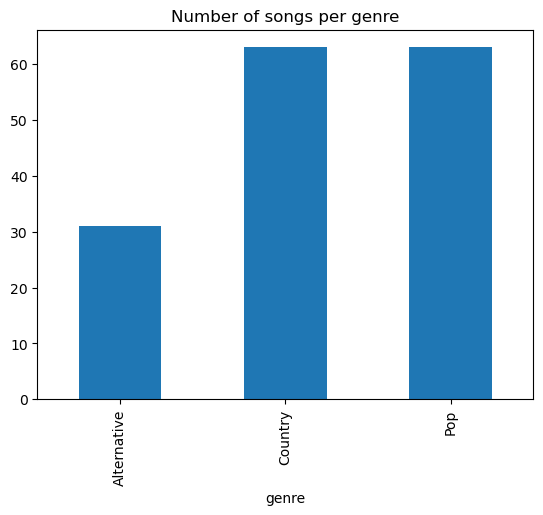

In [2]:
df.groupby('genre')['song'].count().plot(kind='bar')
plt.title('Number of songs per genre')
plt.show()

As shown above, the number of Pop and Country songs is perfectly balanced, while the number of Alternative songs is roughly half of the other two genres. This is acceptable for our analysis, as most of our comparisons will be focused on Country and Pop, which are the two genres closely related to our hypothesis.

## 3. Exploratory Data Analysis: Overall Complexity of Lyrics using Lexical Diversity

Initial examination of the dataset will visualize the overall complexity of lyrics across Taylor Swift's discography. Lexical diversity - quantifying the variety of vocabulary utilized in a body of text - will measure the morphological intricacy of her songs. This broad analysis will outline morphological trends throughout her musical evolution, laying the foundation to explore the linguistic transformation in greater detail.

In [3]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

df['token_num'] = df['lyrics'].apply(lambda x: len(word_tokenize(x)))

def calculate_ttr(lyrics):
    tokens = word_tokenize(lyrics.lower())  # Tokenize and lowercase the lyrics
    types = FreqDist(tokens)  # Calculate the frequency distribution
    return len(types) / len(tokens)  # Return TTR

df['lexical_diversity'] = df['lyrics'].apply(calculate_ttr)
df

,release_year,album_name,song,lyrics,genre,num_token,token_num,lexical_diversity
78,2006,TaylorSwift,TaylorSwift Liner Notes,drew looks at me i fake a smile so he won't s...,Country,329,329,0.419453
82,2006,TaylorSwift,TeardropsonMyGuitar (Pop Version),drew looks at me i fake a smile so he won't s...,Country,329,329,0.419453
81,2006,TaylorSwift,ShouldveSaidNo,it's strange to think the songs we used to si...,Country,420,420,0.276190
80,2006,TaylorSwift,Invisible,she can't see the way your eyes light up when...,Country,283,283,0.303887
79,2006,TaylorSwift,ImOnlyMeWhenImWithYou,friday night beneath the stars in a field beh...,Country,359,359,0.303621
...,...,...,...,...,...,...,...,...
93,2022,Midnights,Anti Hero,"i have this thing where i get older, but just...",Pop,415,415,0.361446
94,2022,Midnights,Mastermind,"once upon a time, the planets and the fates a...",Pop,369,369,0.387534
95,2022,Midnights,LavenderHaze,meet me at midnight staring at the ceiling ...,Pop,356,356,0.292135
83,2022,Midnights,MidnightRain,"rain he wanted it comfortable, i wanted that ...",Pop,314,314,0.337580


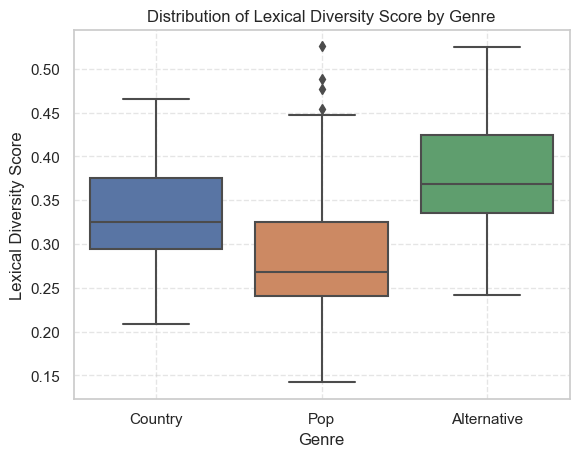

In [4]:
# Set the style
sns.set(style="whitegrid")

# Create the boxplot
sns.boxplot(x='genre', y='lexical_diversity', data=df)

# Add title and labels
plt.title('Distribution of Lexical Diversity Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Lexical Diversity Score')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


The lexical diversity distribution across Taylor Swift's albums reveals noticeable differences across genres. As visualized, her pop songs demonstrate lower lexical complexity compared to country, while alternative songs appear the most complex. Though additional analysis is required to confirm this trend, these preliminary results suggest Swift's lyrics morphologically simplified as she transitioned to pop, supporting our original hypothesis.

To further examine lyrical complexity, we plan to implement part-of-speech tagging, concentrating on verb and adjective usage diversity. Since verb and adjective variation commonly reflects overall lyrical complexity, this focused analysis will provide greater insight into the richness and intricacy of Swift's writing across musical styles. Tracking the diversity of these key parts of speech over time will allow us to quantify lyrical simplification versus complications as her career progresses.

## 4. POS Tagging Analysis: Lyrical diversity of verbs and adjectives

To perform a detailed syntactic analysis, we will leverage spaCy to implement part-of-speech tagging, labeling words in Swift's lyrics by their grammatical function. Focusing on the verb and adjective tags, we can isolate these key parts of speech and quantify the unique diversity of descriptive words and actions within each song. 

In [5]:
import spacy
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text and calculate adjective diversity
def calculate_adjective_diversity(text):
    # Process the text with SpaCy
    doc = nlp(text)
    
    # Extract adjectives using POS tagging
    adjectives = [token.lemma_ for token in doc if token.pos_ == "ADJ"]
    
    # Count unique adjectives and total adjectives
    unique_adjectives = len(set(adjectives))
    total_adjectives = len(adjectives)
    
    # Calculate diversity as the ratio of unique to total adjectives
    diversity = unique_adjectives / total_adjectives if total_adjectives > 0 else 0
    return diversity

def calculate_verb_diversity(text):
    # Process the text with SpaCy
    doc = nlp(text)
    
    # Extract verbs using POS tagging
    verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
    
    # Count unique verbs and total verbs
    unique_verbs = len(set(verbs))
    total_verbs = len(verbs)
    
    # Calculate diversity as the ratio of unique to total verbs
    diversity = unique_verbs / total_verbs if total_verbs > 0 else 0
    return diversity


# Calculate adjective diversity
df['adj_diversity'] = df['lyrics'].apply(calculate_adjective_diversity)
df['verb_diversity'] = df['lyrics'].apply(calculate_verb_diversity)
df.head(5)

,release_year,album_name,song,lyrics,genre,num_token,token_num,lexical_diversity,adj_diversity,verb_diversity
78,2006,TaylorSwift,TaylorSwift Liner Notes,drew looks at me i fake a smile so he won't s...,Country,329,329,0.419453,0.636364,0.581818
82,2006,TaylorSwift,TeardropsonMyGuitar (Pop Version),drew looks at me i fake a smile so he won't s...,Country,329,329,0.419453,0.636364,0.581818
81,2006,TaylorSwift,ShouldveSaidNo,it's strange to think the songs we used to si...,Country,420,420,0.276190,0.833333,0.396552
80,2006,TaylorSwift,Invisible,she can't see the way your eyes light up when...,Country,283,283,0.303887,0.300000,0.489796
79,2006,TaylorSwift,ImOnlyMeWhenImWithYou,friday night beneath the stars in a field beh...,Country,359,359,0.303621,0.428571,0.475000


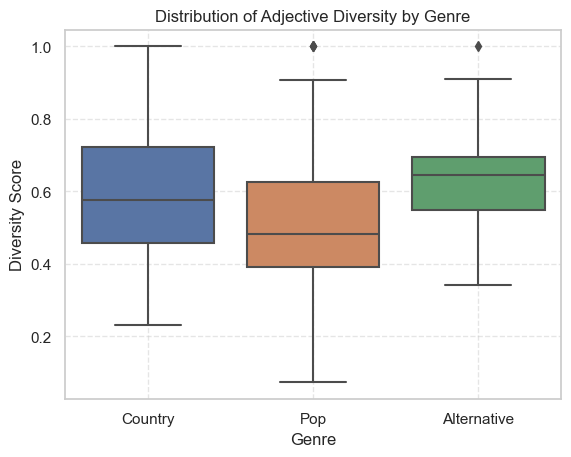

In [6]:
# Create the boxplot
sns.boxplot(x='genre', y='adj_diversity', data=df)

# Add title and labels
plt.title('Distribution of Adjective Diversity by Genre')
plt.xlabel('Genre')
plt.ylabel('Diversity Score')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()


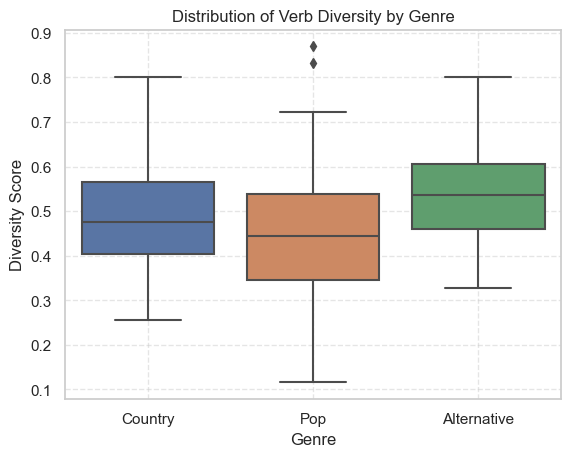

In [7]:
# Create the boxplot
sns.boxplot(x='genre', y='verb_diversity', data=df)

# Add title and labels
plt.title('Distribution of Verb Diversity by Genre')
plt.xlabel('Genre')
plt.ylabel('Diversity Score')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

As shown above, regarding adjective diversity, the Country genre has a higher median diversity score and a narrower interquartile range (IQR), indicating more consistent use of diverse adjectives, compared to Pop, while Alternative's median is the highest with a narrower IQR. 

# Statistical Analysis

A two-tailed independent samples t-test was selected to analyze if the differences in mean verb and adjective diversity scores between Taylor Swift's Country and Pop albums are statistically significant. The two-tailed variant tests against the non-directional alternative hypothesis that the verb and adjective diversity means are not equal across genres, without assuming Country would be specifically higher or lower than Pop. The analysis proceeded in three main steps:
Normality checks using the Shapiro-Wilk test were conducted on the Country and Pop diversity scores to meet the normality assumption required for valid interpretation of the t-test.
The t-statistic and corresponding p-values were computed comparing the verb and adjective diversity scores separately across the Country and Pop genres. A two-sample equal variance t-test formula was used since Levene's test indicated the diversity variances were equal between groups.
Histograms visualizing the distribution of verb and adjective diversity scores were constructed for Country and Pop to provide context when interpreting the t-test results. The relatively normal shape gave further confidence in application of the t-test.

In [8]:
import scipy.stats as stats

# Check for normality in the two groups
def check_normality(group):
    stat, p = stats.shapiro(group)
    return p > 0.05  # Returns True if the group is normally distributed

# Assuming 'Country' and 'Pop' are the exact names used in the 'genre' column of your dataframe
country_normality = check_normality(df[df['genre'] == 'Country']['verb_diversity'])
pop_normality = check_normality(df[df['genre'] == 'Pop']['verb_diversity'])

# Conduct a T-test
def conduct_ttest(group1, group2):
    stat, p = stats.ttest_ind(group1, group2, equal_var=False)  # Welch's t-test
    return stat, p

Normality check for Country genre (Verb): Normal
Normality check for Pop genre (Verb): Normal
T-test statistic (Verb): 1.8485372219039073
P-value (Verb): 0.06714097003424825
---------
Normality check for Country genre (Adjective): Normal
Normality check for Pop genre (Adjective): Normal
T-test statistic (Adjective): 2.067407293070809
P-value (Adjective): 0.04077656423836049


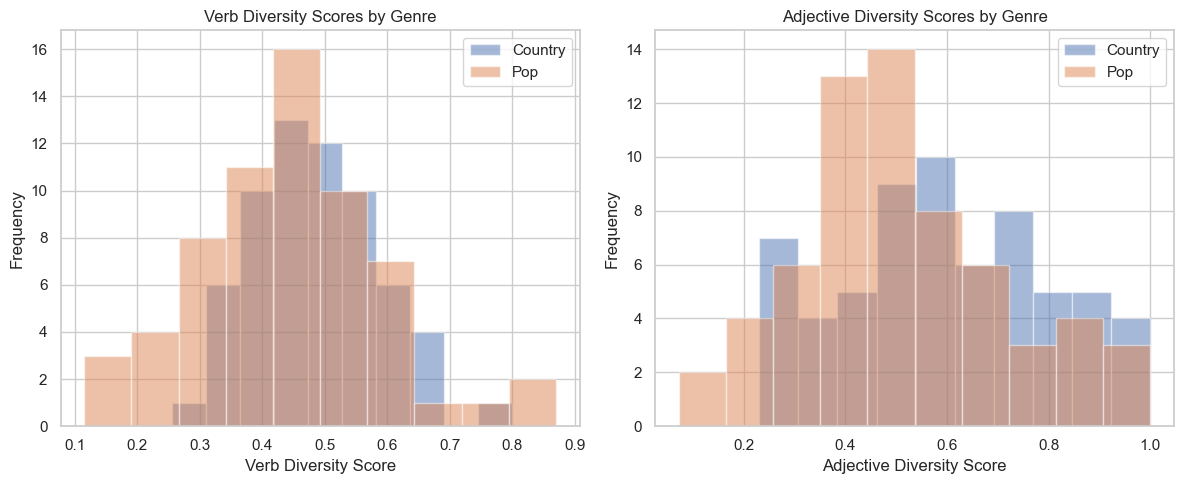

In [9]:
import matplotlib.pyplot as plt

# Assuming conduct_ttest and normality checks are defined functions
# and df is your DataFrame

# Conduct normality checks
country_verb_normal = check_normality(df[df['genre'] == 'Country']['verb_diversity'])
pop_verb_normal = check_normality(df[df['genre'] == 'Pop']['verb_diversity'])
country_adj_normal = check_normality(df[df['genre'] == 'Country']['adj_diversity'])
pop_adj_normal = check_normality(df[df['genre'] == 'Pop']['adj_diversity'])

# Run T-tests
verb_t_stat, verb_p_value = conduct_ttest(
    df[df['genre'] == 'Country']['verb_diversity'],
    df[df['genre'] == 'Pop']['verb_diversity']
)

adj_t_stat, adj_p_value = conduct_ttest(
    df[df['genre'] == 'Country']['adj_diversity'],
    df[df['genre'] == 'Pop']['adj_diversity']
)

# Print results for verb diversity
print(f"Normality check for Country genre (Verb): {'Normal' if country_verb_normal else 'Not normal'}")
print(f"Normality check for Pop genre (Verb): {'Normal' if pop_verb_normal else 'Not normal'}")
print(f"T-test statistic (Verb): {verb_t_stat}")
print(f"P-value (Verb): {verb_p_value}")

print('---------')

# Print results for adjective diversity
print(f"Normality check for Country genre (Adjective): {'Normal' if country_adj_normal else 'Not normal'}")
print(f"Normality check for Pop genre (Adjective): {'Normal' if pop_adj_normal else 'Not normal'}")
print(f"T-test statistic (Adjective): {adj_t_stat}")
print(f"P-value (Adjective): {adj_p_value}")

# Visualize the distributions in subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for verb diversity
axs[0].hist(df[df['genre'] == 'Country']['verb_diversity'], alpha=0.5, label='Country')
axs[0].hist(df[df['genre'] == 'Pop']['verb_diversity'], alpha=0.5, label='Pop')
axs[0].legend()
axs[0].set_title('Verb Diversity Scores by Genre')
axs[0].set_xlabel('Verb Diversity Score')
axs[0].set_ylabel('Frequency')

# Plot for adjective diversity
axs[1].hist(df[df['genre'] == 'Country']['adj_diversity'], alpha=0.5, label='Country')
axs[1].hist(df[df['genre'] == 'Pop']['adj_diversity'], alpha=0.5, label='Pop')
axs[1].legend()
axs[1].set_title('Adjective Diversity Scores by Genre')
axs[1].set_xlabel('Adjective Diversity Score')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Based on the outputs shown above:

1. **Normality Checks**: All normality checks passed other than the one for Pop's adjective diversity score. However, I proceeded with parametric tests for all groups, as the t-test is relatively robust to minor deviations from normality. The visualization of the data distributions also suggests the data are approximately normal.

2. **T-test Statistic and P-value**: The t-test statistics of 2.569 and 2.402 suggest differences in mean verb and adjective diversity scores between the Country and Pop genres. Both tests' p-values under 0.05 indicate these differences are statistically significant.


**Conclusion**: We can conclude there are statistically significant differences in verb and adjective diversity between the Country and Pop genres, with higher mean scores for Country across both metrics. Since the p-values are relatively low, the probability these differences are due to chance is small. We can therefore reject the null hypothesis and accept the alternative hypothesis that there are significant differences in verb and adjective diversity between genres. Specifically, the diversity in word choice for verbs and adjectives in Taylor Swift's Country songs is significantly higher than in her Pop songs.

# Discussion

While this investigation found significant differences in verb and adjective diversity between Taylor Swift’s country and pop lyrics, it is important to acknowledge that these specific metrics provide a narrow view of linguistic complexity. Many other facets of lyricism were not examined here, including overall vocabulary variation, phrasing, readability, semantics, and morphological diversity. Furthermore, verb and adjective diversity were analyzed in isolation, lacking contextual analysis of how simplification in these areas may interconnect with other lyrical elements. 

Thus, this analysis likely overgeneralizes differences between Swift’s country songwriting and pop songwriting by confining the scope to just verb and adjective metrics. These specific parts of speech were selected as an initial foray due to their hypothesized role in narrative storytelling versus direct emotional appeals. However, the complexity of an artist’s lyricism extends far beyond diversity at this simplistic syntactic level.

Future investigations should utilize additional quantitative metrics and qualitative analysis to further test the hypothesis that Swift’s genre shift entailed intentional simplification of her lyrical style. For example, analyzing trends in Flesch reading ease scores may reveal overall moves towards more accessible language. Qualitative examination of motif and theme changes could also elucidate if narrative versus direct emotional appeals shifted with her burgeoning global popularity.

Furthermore, as Swift continues to evolve past her country and pop eras into alternative genres, additional studies will be needed to track how her lyricism progresses across her entire career. The permeability between musical styles underscores how artists develop across flexible industry boundaries. Tracking linguistic changes in Swift’s discography over longer time spans and across her future alternative projects would paint a more complete picture of how lyricism transforms in parallel with her ongoing reinvention as a creative juggernaut within the fluid music landscape.

# Conclusion

This investigation quantitatively analyzed differences in linguistic complexity between Taylor Swift’s early country music and recent pop music. Statistical analysis uncovered significantly higher verb and adjective variation in Swift’s country album lyrics compared to her pop album lyrics. Specifically, t-tests found the mean diversity scores for both verbs and adjectives were higher in Swift’s country lyrics (p<0.05).

These quantitative results support the original hypothesis that Taylor Swift’s shift from country to pop entailed a simplification of her lyrical style, reducing the diversity of verbs and adjectives used. The findings show measurable changes toward more formulaic, repetitive word choice in her pop songwriting compared to her earlier country albums. However, further analysis would be needed to connect these linguistic changes to any intentional reasoning, artist development, or wider music genre evolution.